# Importing packages

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [85]:
df = pd.read_csv('loan-train.csv')

In [86]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data cleaning and preprocessing

In [87]:
df.drop('Loan_ID',axis=1,inplace=True)
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

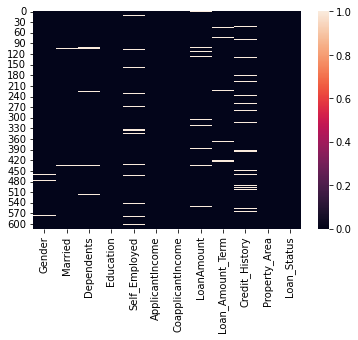

In [88]:
sns.heatmap(df.isnull())

In [89]:
df['Gender'].isnull().sum()

13

# Handling null values

In [90]:
def most_common_gender(gender):
    gender = list(gender)
    return max(set(gender),key=gender.count)

df['Gender'].fillna(most_common_gender(df['Gender']),inplace=True)

In [91]:
def most_common_married(married):
    married = list(married)
    return max(set(married),key=married.count)

df['Married'].fillna(most_common_married(df['Married']),inplace=True)

In [92]:
def most_common_dependents(dep):
    dep = list(dep)
    return max(set(dep),key=dep.count)

df['Dependents'].fillna(most_common_dependents(df['Dependents']),inplace=True)

In [93]:
def most_common_self_emp(self_emp):
    self_emp = list(self_emp)
    return max(set(self_emp),key=self_emp.count)

df['Self_Employed'].fillna(most_common_self_emp(df['Self_Employed']),inplace=True)

In [94]:
def most_common_Loan_Amount_Term(loan_amount_term):
    loan_amount_term = list(loan_amount_term)
    return max(set(loan_amount_term),key=loan_amount_term.count)

df['Loan_Amount_Term'].fillna(most_common_Loan_Amount_Term(df['Loan_Amount_Term']),inplace=True)

In [95]:
def most_common_credit_history(credit_history):
    credit_history = list(credit_history)
    return max(set(credit_history),key=credit_history.count)

df['Credit_History'].fillna(most_common_credit_history(df['Credit_History']),inplace=True)

In [96]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [97]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# EDA

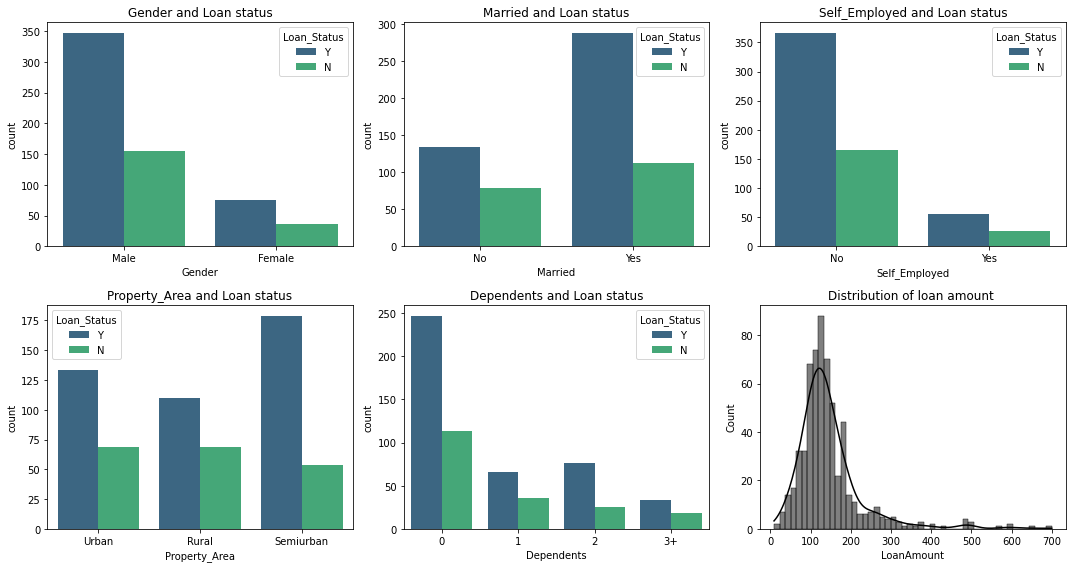

In [98]:
fig, axes = plt.subplots(2,3,figsize=(15,8))

sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='viridis',ax=axes[0,0])
axes[0,0].set_title('Gender and Loan status')

sns.countplot(df['Married'],hue=df['Loan_Status'],palette='viridis',ax=axes[0,1])
axes[0,1].set_title('Married and Loan status')

sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='viridis',ax=axes[0,2])
axes[0,2].set_title('Self_Employed and Loan status')


sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='viridis',ax=axes[1,0])
axes[1,0].set_title('Property_Area and Loan status')

sns.countplot(df['Dependents'],hue=df['Loan_Status'],palette='viridis',ax=axes[1,1],)
axes[1,1].set_title('Dependents and Loan status')

sns.histplot(df['LoanAmount'],ax=axes[1,2],kde=True,color='black',bins=50)
axes[1,2].set_title('Distribution of loan amount ')

plt.tight_layout()


Gender - men have got loan apporval more then women

Married - people who have got married they are more likely to get a loan.

Self employed - pepple who were not a employed they got a loan.

Area - semiurban area's people have got the most loan apporval comparatively urban and rural

Dependent - 0 dependents have got most loan apporovals.

#### Feture transformation for objective datatypes

In [99]:
def Feture_Transformation(df):
    
    obj = df.select_dtypes(include='object')
    num = df.select_dtypes(exclude='object')
    obj = pd.get_dummies(obj,drop_first=True)
    df = pd.concat([obj,num],axis=1)
    
    return df

df = Feture_Transformation(df)

<AxesSubplot:>

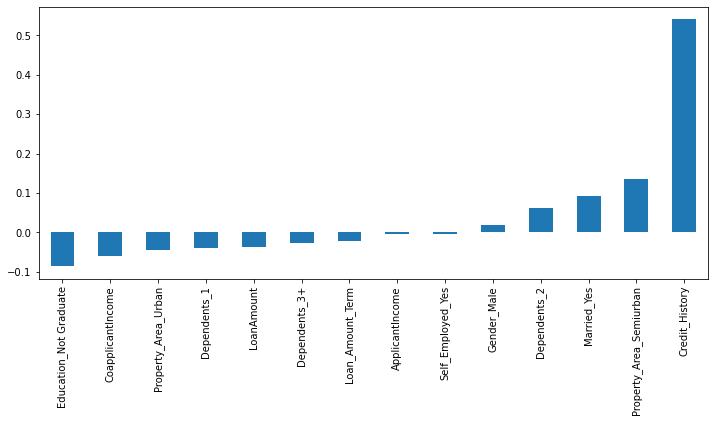

In [100]:
plt.figure(figsize=(12,5))
df.corr()['Loan_Status_Y'].sort_values()[:-1].plot(kind='bar')

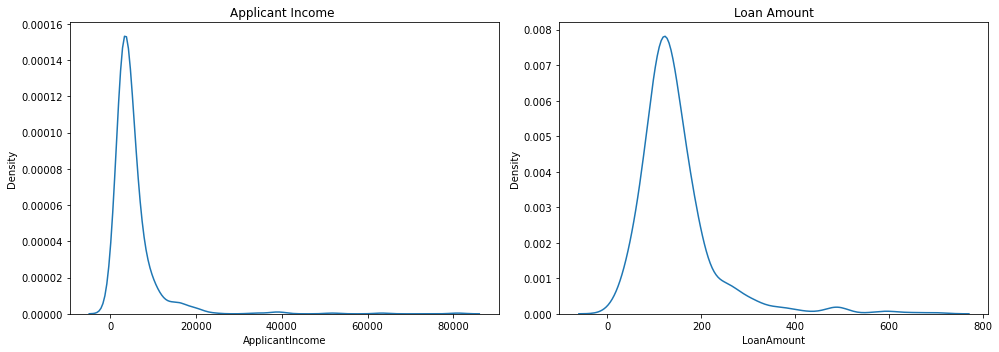

In [101]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.kdeplot(df['ApplicantIncome'],ax=axes[0])
axes[0].set_title('Applicant Income ')

sns.kdeplot(df['LoanAmount'],ax=axes[1])
axes[1].set_title('Loan Amount')


plt.tight_layout()

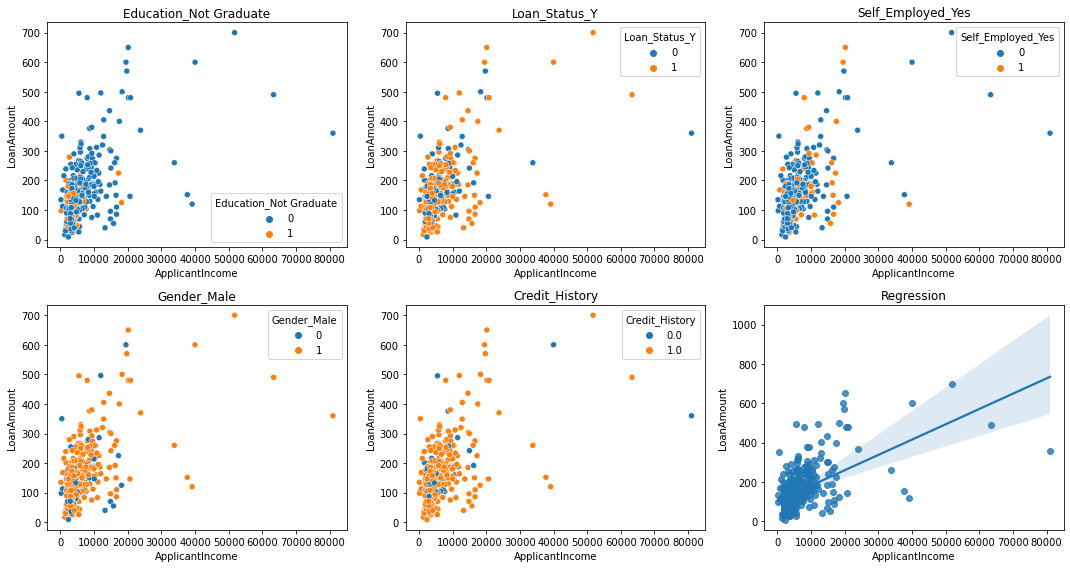

In [102]:
 fig, axes = plt.subplots(2,3,figsize=(15,8))

sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue=df['Education_Not Graduate'],ax=axes[0,0])
axes[0,0].set_title('Education_Not Graduate')

sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue=df['Loan_Status_Y'],ax=axes[0,1])
axes[0,1].set_title('Loan_Status_Y')

sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue=df['Self_Employed_Yes'],ax=axes[0,2])
axes[0,2].set_title('Self_Employed_Yes')


sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue=df['Gender_Male'],ax=axes[1,0])
axes[1,0].set_title('Gender_Male')

sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue=df['Credit_History'],ax=axes[1,1])
axes[1,1].set_title('Credit_History')

sns.regplot(data=df,x='ApplicantIncome',y='LoanAmount',ax=axes[1,2])
axes[1,2].set_title('Regression')



plt.tight_layout()

# Data preparing

In [103]:
X = df.drop('Loan_Status_Y',axis=1)

In [104]:
y = df['Loan_Status_Y']

### Train test split 

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Feature scaling

In [108]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model training

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,y_train)
Logistic_pred = Logistic_model.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [111]:
print(classification_report(y_test,Logistic_pred))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [112]:
print('The Model accuracy is: ',np.round(accuracy_score(y_test,Logistic_pred),2)*100,'%')

The Model accuracy is:  78.0 %


# Removing outliers

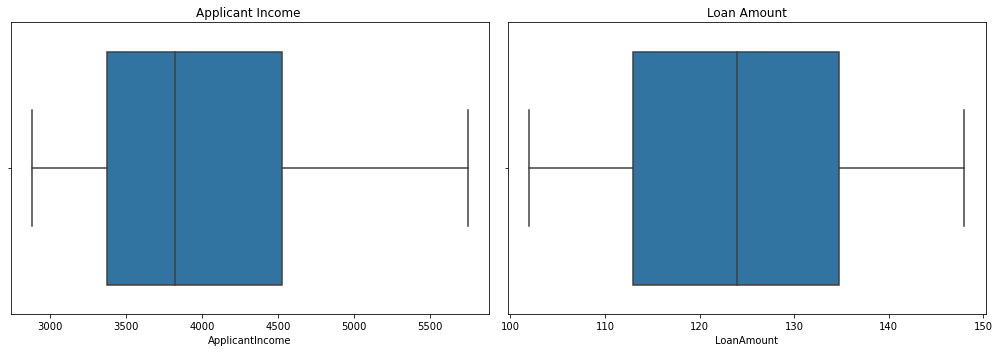

In [113]:
def Keep_IQR(df,column_name):
    q75, q25 = np.percentile(df[column_name],[75 ,25])
    df = df[(df[column_name]>q25) & (df[column_name]<q75)]
    return df

df = Keep_IQR(df,'ApplicantIncome')

df = Keep_IQR(df,'LoanAmount')

fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.boxplot(df['ApplicantIncome'],ax=axes[0])
axes[0].set_title('Applicant Income ')

sns.boxplot(df['LoanAmount'],ax=axes[1])
axes[1].set_title('Loan Amount')


plt.tight_layout()

In [114]:
X = df.drop('Loan_Status_Y',axis=1)
y = df['Loan_Status_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,y_train)
Logistic_pred = Logistic_model.predict(X_test)

In [115]:
print(classification_report(y_test,Logistic_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.87      1.00      0.93        33

    accuracy                           0.89        44
   macro avg       0.93      0.77      0.82        44
weighted avg       0.90      0.89      0.87        44



In [116]:
print('The Model accuracy is: ',np.round(accuracy_score(y_test,Logistic_pred),2)*100,'%')

The Model accuracy is:  89.0 %


# Testing the model on unseen data

In [117]:
test = pd.read_csv('loan-test.csv')
test.drop('Loan_ID',axis=1,inplace=True)
test.dropna(inplace=True)

ddf = Feture_Transformation(test)
ddf = scaler.transform(ddf)
Logistic_model.predict(ddf)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=uint8)

#### Model deployment

In [118]:
import joblib

In [119]:
joblib.dump(Logistic_model,'Logistic_model.pkl')

['Logistic_model.pkl']

# Thank you